# Project - Investigate medical dataset 

**This dataset collect information from 100k medical appointment in Brazil and focused on the question whether or not the patients show up for there appointment. A number of characterictics about the patient are included in each row** 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib
import seaborn as sns
import collections
%matplotlib inline


### Analyzing the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jilkothari/Udacity-DataAnalystNanodegree/master/Project2%20-%20Medical_Appointments-No_Show/noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

There are 14 variable and 110527 datapoints

**checking if there any duplicate in dataset**

In [5]:
df.duplicated().sum()

0

Inference drawn:  
 Dataset don't have duplicate value

**checking if there any null/missing value**

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Inferernce drawn:  
There is no null value in the dataset.

**Displaying the columns in the dataset**

In [7]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Inference drawn:  
some column name have worng spelling and are in wrong format so they  will be cleaned accordingly

In [8]:
df.rename(columns = {'Hipertension': 'Hypertension',
                     'AppointmentID' :'Appointment_id',
                     'ScheduledDay': 'Scheduled_day',
                      'AppointmentDay':'Appointment_day',
                      'Handcap': 'Handicap',
                       'No-show': 'No_show',
                        'PatientId': 'Patient_id'}, inplace  = True)

**Checking if datatype of variable are in correct format**

In [9]:
df.dtypes

Patient_id         float64
Appointment_id       int64
Gender              object
Scheduled_day       object
Appointment_day     object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS_received         int64
No_show             object
dtype: object

Inference drawn:  
ScheduledDay and AppointmentDay have datatype of object but they should in datetime format

In [10]:
df.Patient_id.unique()

array([2.98724998e+13, 5.58997777e+14, 4.26296230e+12, ...,
       7.26331493e+13, 9.96997666e+14, 1.55766317e+13])

Inference drawn:  
The data type of id should in int not in float.

In [11]:
df.Patient_id = df.Patient_id.astype('int64')

In [12]:
df.Scheduled_day.unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [13]:
df.Appointment_day.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

Inference drawn:  
convert datatype from  object to datetime.

In [14]:
df.Scheduled_day = df.Scheduled_day.apply(np.datetime64)

In [15]:
df.Appointment_day = df.Scheduled_day.apply(np.datetime64)

In [16]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

Inference drawn:  
Some value are in negative which is highly unlikely so we have to filter aut the outliers.

In [17]:
df.Age = df[df.Age >= 0]

**Adding new column display the waiting period for a patient.**

In [18]:
df['Wait'] = (df.Appointment_day.dt.date - df.Scheduled_day.dt.date).dt.days
df= df[(df.Wait>=0)]

In [19]:
df['appointment_day'] = df.Scheduled_day.dt.day_name()

In [20]:
collections.Counter(df.appointment_day)

Counter({'Friday': 18915,
         'Wednesday': 24262,
         'Tuesday': 26168,
         'Thursday': 18073,
         'Monday': 23085,
         'Saturday': 24})

In [21]:
df

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Wait,appointment_day
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29 18:38:08,29872499824296.0,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29 16:08:27,558997776694438.0,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29 16:19:04,4262962299951.0,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29 17:29:31,867951213174.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29 16:07:23,8841186448183.0,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03 09:15:35,2016-05-03 09:15:35,2572134369293.0,MARIA ORTIZ,0,0,0,0,0,1,No,0,Tuesday
110523,3596266328735,5650093,F,2016-05-03 07:27:33,2016-05-03 07:27:33,3596266328735.0,MARIA ORTIZ,0,0,0,0,0,1,No,0,Tuesday
110524,15576631729893,5630692,F,2016-04-27 16:03:52,2016-04-27 16:03:52,15576631729893.0,MARIA ORTIZ,0,0,0,0,0,1,No,0,Wednesday
110525,92134931435557,5630323,F,2016-04-27 15:09:23,2016-04-27 15:09:23,92134931435557.0,MARIA ORTIZ,0,0,0,0,0,1,No,0,Wednesday


### Observations

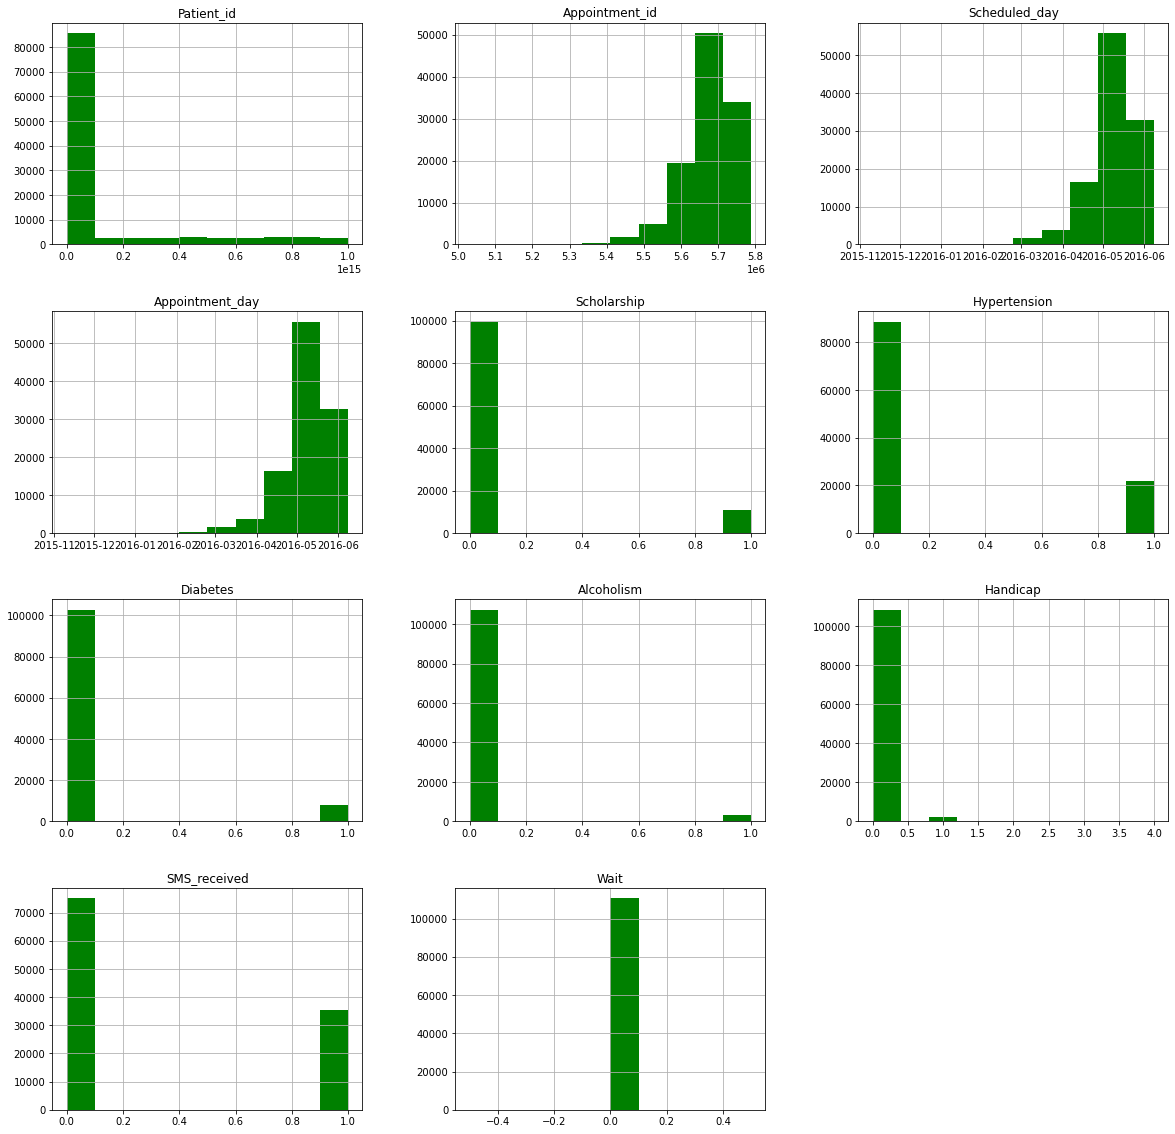

In [22]:
df.hist(figsize = (20,20), color = 'green');

Observation made from the histogram are: 

1) Majority of patients are not alcoholism. only a very small amount of patient are alcoholism.  
2) Majority of patients are not diabetes. only a very small amount of patient are diabetes.  
3) Majority of patients are not handicapped. Only a very small amount of patients have some disability
4) Around 75% of patients do not have Hypertension while 25% of patients do have Hypertension
5) Almost 7k patients did receive a text message whereas almost 3.9k patients did not receive a text message
6) Majority of patients do not have to wait for more than 20 days with a small amount of patients having to wait upto 75 days

**Percentage of patients missed the appointment?**

In [23]:
x = (df[['No_show']] == 'Yes').sum()
y = (df[['No_show']] == 'No').sum()

In [24]:
percentage = x/(x+y)*100
percentage

No_show    20.193256
dtype: float64

Inference drawn:  
17% of patient miss the appintment,

**Did gender play any role in the possibility of a patient missing the appointment?**

In [48]:
female =df[ df['Gender'] == 'F']
total_females = female.shape[0]

male = df[df['Gender'] == 'M']
total_males = male.shape[0]

female_who_did_not_attend = (female['No_show'] == 'Yes').sum()
female_who_attend = (female['No_show'] =='No').sum()

male_who_did_not_attend = (male['No_show'] =='Yes').sum()
male_who_attend = (male['No_show'] == 'No').sum()

The percentage of female who missed the appointment?

In [52]:
female_pecentage = female_who_did_not_attend/total_females*100
round(female_pecentage,2)


20.31

20.31% of female did not attend 

In [54]:
male_percentage = male_who_did_not_attend/total_females*100
round(male_percentage,2)

10.75

In [55]:
round(male_percentage,2), 'of male did not attend'

(10.75, 'of male did not attend')

<AxesSubplot:xlabel='Gender,No_show'>

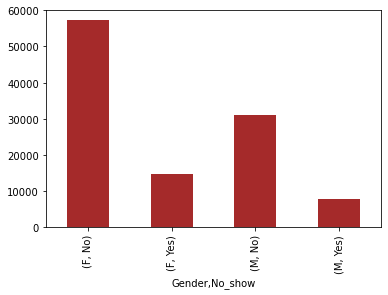

In [58]:
gender = df.groupby('Gender').No_show.value_counts()
gender.plot(kind = 'bar', color = 'brown')

Inference:  
1) The percentage of female patients who missed there appointment is approximately equal to the number of male patient who missed the appointment  
2) The percentage of female patients who attend there appointment is approximately equal to the number of male patient who attend the appointment.  
3) Thus, the gender of a person does not play significant role in missing appointment.

**Does the day of appointment influence the patients decision to attend or miss the appointment?**

In [71]:
day = df.groupby('appointment_day').No_show.value_counts();

In [72]:
day

appointment_day  No_show
Friday           No         15028
                 Yes         3887
Monday           No         18524
                 Yes         4561
Saturday         No            23
                 Yes            1
Thursday         No         14373
                 Yes         3700
Tuesday          No         20877
                 Yes         5291
Wednesday        No         19383
                 Yes         4879
Name: No_show, dtype: int64

In [74]:
percent = []
i = 0
while i<len(day)-1:
    percent.append(day[i+1]*100/(day[i]+day[i+1]))
    i=i+2
    
percent


[20.54982817869416,
 19.7574182369504,
 4.166666666666667,
 20.472528080562164,
 20.21935188015897,
 20.109636468551646]

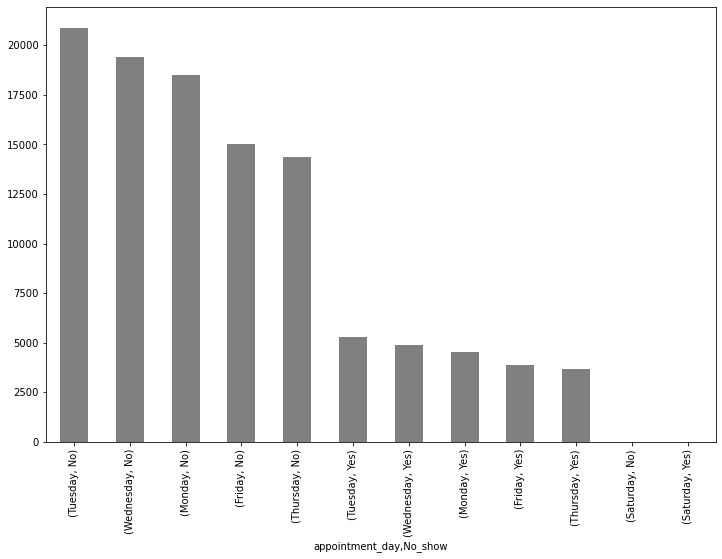

In [77]:
day = day.sort_values(ascending = False)
day.plot(kind = 'bar', figsize = (12,8), color = 'grey');

Inference:
1)The number of appointments scheduled, attended and missed, both are negligible  
2)The number of appointents , both missed and attended are maximum for Tuesday  
3)Wednesday comes right after Tuesday for both having the number of appointments attended as well as missed  
4)It is followed by Monday with a lesser number of patients attening as well as missing the appointent  
5)The number of patients attending as well as issing the appointment keeps on decreasing for Thursday and Friday  
6)Thus, the numbers of patients attending as well as missing the appointnets goes hand in hand     
7)For all the other days, around 20% of the scheduled appointents will be cancelled

**Does the sending sms influnece the patient's attendence**

In [81]:
msg = df.groupby('SMS_received').No_show.value_counts()
msg

SMS_received  No_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No_show, dtype: int64

In [83]:
msg_not_received = msg[0][1]*100/(msg[0][0]+msg[0][1])
msg_not_received

16.703311346525417

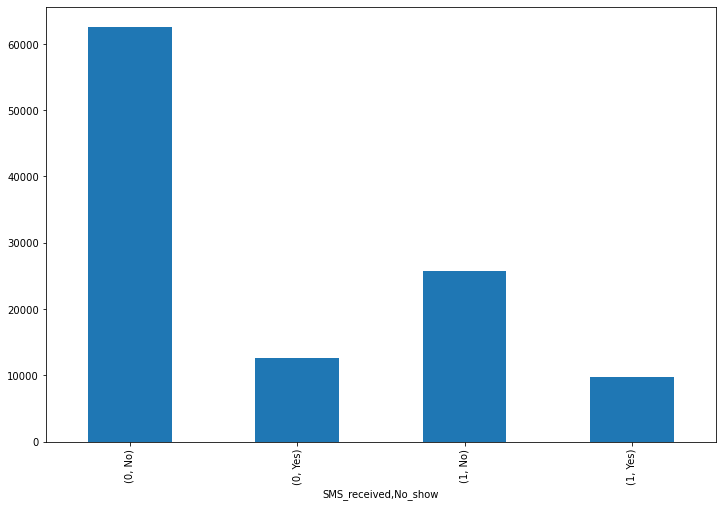

In [87]:
msg.plot(kind='bar', figsize = (12,8));

Inference drawn:  
1)16% of patients who did not recieve the msg did not show up for appointment.  
2)27% of patinets did not attend the appointment in spite of getting msg  
3)patients recieving msg have higher tendency of missing the apointment.

**If a person have a medical issue then they are more likely to have a no show?**

In [90]:
hypertension_data = df.groupby('Hypertension').No_show.value_counts()
diabetes_data = df.groupby('Diabetes').No_show.value_counts()
alcoholism_data = df.groupby('Alcoholism').No_show.value_counts()
hypertension_data, diabetes_data, alcoholism_data


(Hypertension  No_show
 0             No         70179
               Yes        18547
 1             No         18029
               Yes         3772
 Name: No_show, dtype: int64,
 Diabetes  No_show
 0         No         81695
           Yes        20889
 1         No          6513
           Yes         1430
 Name: No_show, dtype: int64,
 Alcoholism  No_show
 0           No         85525
             Yes        21642
 1           No          2683
             Yes          677
 Name: No_show, dtype: int64)

<AxesSubplot:xlabel='Hypertension,No_show'>

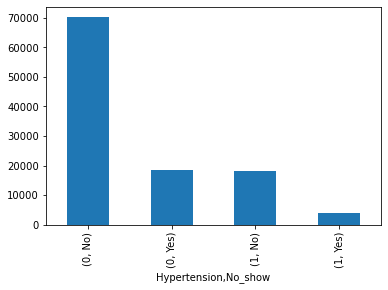

In [91]:
hypertension_data.plot(kind="bar")

<AxesSubplot:xlabel='Alcoholism,No_show'>

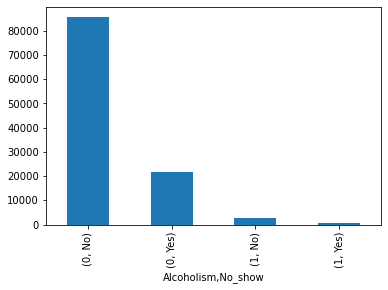

In [92]:
alcoholism_data.plot(kind='bar')

<AxesSubplot:xlabel='Diabetes,No_show'>

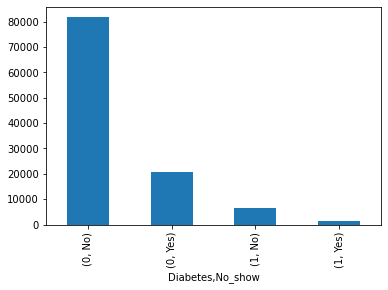

In [93]:
diabetes_data.plot(kind="bar")

## Conclusion:

1)In this project, we analyzed the no show database of patients  
2)We analyzed all the variables of the dataset  
3)Gender of a patient does not have influence on whether the patient shows up or no  
4)Whether the patient shows up or not is affected by the amount of time between the patient scheduled his appointment and his appointment  
5)Patient is more likely to show up if the time between the patient scheduled his appointment and his appointment is less  
6)The weekday on which the appointment has been scheduled does not affect the patient's behaviour except for on Saturday 7)when percentage of patients not showing is the least  
8)Percentage of patients who received a text message are more likely to not show up as compared to patients who have not received a text message by a small amount  
9)Age of a person does not affect if the patients attends or misses his appointment  
10)Percentage of patient having a pre-existing medical condition like Hypertension, Diabetes, Alcoholis are as likely to miss their appointment as conpares to percentage of patients without a medical condition issing their appointments  
11)In some neighbourhoods, patients are more likely to miss their appointmnets as compared to other neighbourhoods  